# Analyze Leech Data

This notebook will help you analyze the class leech dataset.

>**Task**: Run the cell below to get started.

In [1]:
# Set up interactive matplot lib and define a function to interact with plots
%matplotlib nbagg

def onclick(event):
    pos.append([event.xdata,event.ydata])

# Import our packages
import matplotlib.pyplot as plt 
import numpy as np
from scipy.io import loadmat

# Load the relevant data set
data = loadmat('Leech.mat')['data'][0]
dataend = loadmat('Leech.mat')['dataend']
datastart = loadmat('Leech.mat')['datastart']

# Get the sampling rate and can create a time axis for our data
sampling_rate = 40000
timestamps = (np.arange(0, len(data)) * (1.0 / sampling_rate))*1000

print('Let\'s do this thing.')

Let's do this thing.


## Analyze the spontaneous data

Trials 0 through 9 are each 10 seconds of spontaneous data (without any current injection).

> **Tasks**:
> 1. Change the trial number below to count the number of spikes in each 10 second window. This will provide the data for your spike rate.
> 2. Zoom in on 10 different spontaneous spikes (from any trial) to measure your single action potential metrics. *Hint*: You can do so by changing the `xlim`. See the lecture slides for additional details on how to calculate these.
    - Action potential height: Maximum value of the membrane potential during the spontaneous action potential
    - Spike width: defined as the width (in seconds) at the half-peak (the width at a point halfway between the trough and the peak), from the spontaneous AP
    - After-hyperpolarization amplitude (AHP): The amplitude from the resting membrane potential to the trough for a spontaneous AP  

The x (time, in ms) and y (voltage, in volts) position of your cursor will update in the bottom left corner. You can use these values to make your calculations.

<IPython.core.display.Javascript object>


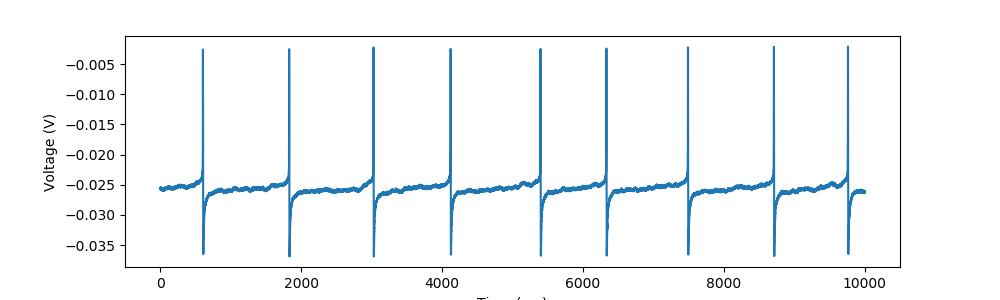

In [36]:
# Change the trial below
this_trial = 0

spontaneous_trial = data[int(datastart[0,this_trial]):int(dataend[0,this_trial])]
spontaneous_timestamps = timestamps[int(datastart[0,this_trial]):int(dataend[0,this_trial])]
spontaneous_timestamps -= spontaneous_timestamps[0]

# set up figure & plt
fig,ax = plt.subplots(figsize=(10,3))

plt.plot(spontaneous_timestamps,spontaneous_trial)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
#plt.xlim([200,700])
plt.show()

## Analyze current injections

Now, we can analyze the current injections. A different current was applied in the first 500 ms of each of these trials. There are ten trials for each level of current injection: 

* Trials 10-19 are -0.5 nA injection
* Trials 20-29 are 1.5 nA injection
* Trials 30-39 are 2.0 nA injection
* Trials 40-49 are 1.0 nA injection

> **Tasks**:
> 1. For each of the current injections, measure the number of spikes elicited by the current injection.
> 2. For each of the **1 nA current injections**, measure the:
    - Latency: Time between the start of the stimulus until the time of the first spike evoked by a stimulus.
    - Inter-spike interval: Difference between the time of an AP and the time of the next AP.
You only need to do this for the FIRST ISI. 


<IPython.core.display.Javascript object>


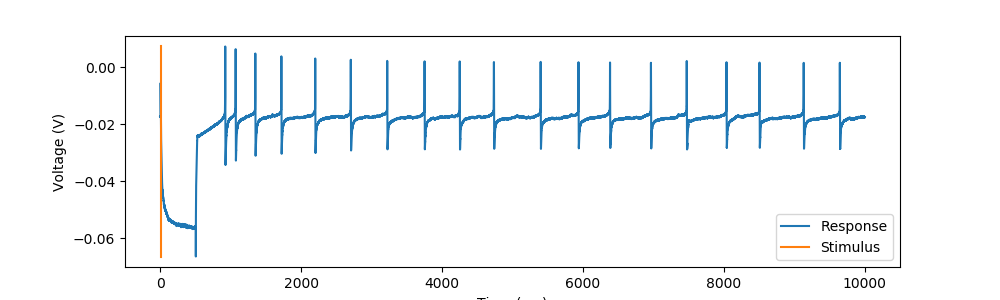

In [35]:
# Change the trial below
this_trial = 10

trial_voltage = data[int(datastart[0,this_trial]):int(dataend[0,this_trial])]
trial_timestamps = timestamps[int(datastart[0,this_trial]):int(dataend[0,this_trial])]
trial_timestamps -= trial_timestamps[0]

# Set up figure and plot
fig,ax = plt.subplots(figsize=(10,3),sharex=True)
plt.plot(trial_timestamps,trial_voltage)
plt.plot([5,5],[trial_voltage.min(),trial_voltage.max()])
plt.xlabel('Time (ms)')
plt.legend(['Response','Stimulus'])
plt.ylabel('Voltage (V)')

# Change the x axis limits
#plt.xlim([0,600])
 
fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()